In [1]:
import pandas as pd
import re
df = pd.read_csv('/opt/ml/project2/level2_klue_nlp-level2-nlp-01/dataset/train/new_val_split.csv')
df

,Unnamed: 0,id,sentence,subject_entity,object_entity,label,source
0,21361,21379,도요하시 역. - 기후 역 구간의 각 도시를 연결. 나고야 철도 창립 때 부터 경합...,"{'word': '도카이 여객철도', 'start_idx': 60, 'end_idx...","{'word': '기후 역', 'start_idx': 10, 'end_idx': 1...",no_relation,wikipedia
1,2085,2086,그러나 남편 콘라트 2세가 황제관을 쓴 뒤 13일 만에 기젤라는 황후로 책봉되었다.,"{'word': '콘라트 2세', 'start_idx': 7, 'end_idx': ...","{'word': '기젤라', 'start_idx': 31, 'end_idx': 33...",per:spouse,wikipedia
2,15841,15855,"이후 인하대학교를 졸업하고 1982년 KBO 리그가 출범하자, OB 베어스의 창단 ...","{'word': 'OB 베어스', 'start_idx': 35, 'end_idx':...","{'word': '1982년', 'start_idx': 15, 'end_idx': ...",org:founded,wikipedia
3,15514,15527,2016년 시즌 스프링 트레이닝 시작 직전에 우리베는 클리블랜드 인디언스 구단과 1...,"{'word': '클리블랜드 인디언스', 'start_idx': 30, 'end_i...","{'word': '2016', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
4,12544,12555,아시아나항공[020560]의 새 주인으로 HDC현대산업개발[294870]이 포함된 ...,"{'word': 'HDC그룹', 'start_idx': 46, 'end_idx': ...","{'word': 'HDC현대산업개발', 'start_idx': 23, 'end_id...",org:members,wikitree
...,...,...,...,...,...,...,...
3238,22639,22661,"미키스 테오도라키스(그리스어: Μίκης Θεοδωράκης, Mikis Theod...","{'word': '미키스 테오도라키스', 'start_idx': 0, 'end_id...","{'word': 'Μίκης Θεοδωράκης', 'start_idx': 17, ...",per:alternate_names,wikipedia
3239,4895,4898,여수시(시장 권오봉)는 2020년 첫 전시로 (사)여수민족미술협회 박금만 작가의 작...,"{'word': '여수시', 'start_idx': 0, 'end_idx': 2, ...","{'word': '권오봉', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
3240,11084,11094,토마스 바흐 국제올림픽위원회 위원장을 비롯한 다수의 국제 스포츠 거물들도 속속 광주...,"{'word': '국제올림픽위원회', 'start_idx': 7, 'end_idx'...","{'word': '토마스 바흐', 'start_idx': 0, 'end_idx': ...",org:top_members/employees,wikitree
3241,24214,24237,트빌리시 대학교(오늘날 그의 이름이 남겨진 I. 자바키슈빌리 트빌리시 국립 대학교)...,"{'word': '조지아', 'start_idx': 64, 'end_idx': 66...","{'word': '트빌리시', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [2]:
# """" 날리기도 해보자.

### entity들이 sentence에 있는지 확인

In [3]:
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    if sub_word not in sen:
        print(sen)
        print(sub_word)
    if obj_word not in sen:
        print(sen)
        print(obj_word)

## 데이터 전처리 과정에서 주어진 index가  바뀜
## -> ★★★ 로 sub_word, obj_word 표시하여 index 인식

In [4]:
def add_star(sentence, sub_word, obj_word, ss, se, os, oe):
    if ss < os:
        new_sentence = sentence[:ss] + star + sub_word + star + sentence[se + 1 : os] + star + obj_word + star + sentence[oe + 1 :]
    else: 
        new_sentence = sentence[:os] + star + obj_word + star + sentence[oe + 1 : ss] + star + sub_word + star + sentence[se + 1 :]
    return new_sentence

In [5]:
idx=0
star="★★★"
for sub,obj,sent in zip(df['subject_entity'], df['object_entity'], df['sentence']):
    
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    # sub_word = sub[1:-1].split("':")[1].replace("'", '').split(',')[0].strip()
    # obj_word = obj[1:-1].split("':")[1].replace("'", '').split(',')[0].strip()
    ss=sub['start_idx']
    se=sub['end_idx']
    os=obj['start_idx']
    oe=obj['end_idx']
    
#     sub_word = sub[1:-1].split("':")[1].replace("'", '').split(',')[0].strip()
#     obj_word = obj[1:-1].split("':")[1].replace("'", '').split(',')[0].strip()

#     ss = int(sub.split("':")[2].split(',')[0].strip())   # subject_start
#     se = int(sub.split("':")[3].split(',')[0].strip())   # sub_end
#     os = int(obj.split("':")[2].split(',')[0].strip())   # obj_start
#     oe = int(obj.split("':")[3].split(',')[0].strip())   # obj_end

    star_sen=add_star(sent, sub_word, obj_word, ss,se,os,oe)
    df['sentence'][idx]=star_sen
    idx+=1

<ipython-input-5-4d63c6eaff34>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][idx]=star_sen


In [6]:
df

,Unnamed: 0,id,sentence,subject_entity,object_entity,label,source
0,21361,21379,도요하시 역. - ★★★기후 역★★★ 구간의 각 도시를 연결. 나고야 철도 창립 때...,"{'word': '도카이 여객철도', 'start_idx': 60, 'end_idx...","{'word': '기후 역', 'start_idx': 10, 'end_idx': 1...",no_relation,wikipedia
1,2085,2086,그러나 남편 ★★★콘라트 2세★★★가 황제관을 쓴 뒤 13일 만에 ★★★기젤라★★★...,"{'word': '콘라트 2세', 'start_idx': 7, 'end_idx': ...","{'word': '기젤라', 'start_idx': 31, 'end_idx': 33...",per:spouse,wikipedia
2,15841,15855,"이후 인하대학교를 졸업하고 ★★★1982년★★★ KBO 리그가 출범하자, ★★★OB...","{'word': 'OB 베어스', 'start_idx': 35, 'end_idx':...","{'word': '1982년', 'start_idx': 15, 'end_idx': ...",org:founded,wikipedia
3,15514,15527,★★★2016★★★년 시즌 스프링 트레이닝 시작 직전에 우리베는 ★★★클리블랜드 인...,"{'word': '클리블랜드 인디언스', 'start_idx': 30, 'end_i...","{'word': '2016', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
4,12544,12555,아시아나항공[020560]의 새 주인으로 ★★★HDC현대산업개발★★★[294870]...,"{'word': 'HDC그룹', 'start_idx': 46, 'end_idx': ...","{'word': 'HDC현대산업개발', 'start_idx': 23, 'end_id...",org:members,wikitree
...,...,...,...,...,...,...,...
3238,22639,22661,"★★★미키스 테오도라키스★★★(그리스어: ★★★Μίκης Θεοδωράκης★★★,...","{'word': '미키스 테오도라키스', 'start_idx': 0, 'end_id...","{'word': 'Μίκης Θεοδωράκης', 'start_idx': 17, ...",per:alternate_names,wikipedia
3239,4895,4898,★★★여수시★★★(시장 ★★★권오봉★★★)는 2020년 첫 전시로 (사)여수민족미술...,"{'word': '여수시', 'start_idx': 0, 'end_idx': 2, ...","{'word': '권오봉', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
3240,11084,11094,★★★토마스 바흐★★★ ★★★국제올림픽위원회★★★ 위원장을 비롯한 다수의 국제 스포...,"{'word': '국제올림픽위원회', 'start_idx': 7, 'end_idx'...","{'word': '토마스 바흐', 'start_idx': 0, 'end_idx': ...",org:top_members/employees,wikitree
3241,24214,24237,★★★트빌리시★★★ 대학교(오늘날 그의 이름이 남겨진 I. 자바키슈빌리 트빌리시 국...,"{'word': '조지아', 'start_idx': 64, 'end_idx': 66...","{'word': '트빌리시', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [7]:
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    if sub_word not in sen:
        print(sen)
        print(sub_word)
    if obj_word not in sen:
        print(sen)
        print(obj_word)

### ㈜ 확인

In [8]:
cnt=0
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    if "㈜" in (sen or sub_word or obj_word):
        cnt+=1
print(cnt)

12


### ㈜ -> (주)

In [9]:
idx=0
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    sub2 = eval(sub)
    obj2 = eval(obj)
    sub_word=sub2['word']
    obj_word=obj2['word']
    if "㈜" in sen:
        sen=sen.replace("㈜","(주)")
        df['sentence'][idx]=sen
    if "㈜" in sub_word:
        sub=sub.replace("㈜","(주)")
        df['subject_entity'][idx]=sub
    if "㈜" in obj_word:
        obj=obj.replace("㈜","(주)")
        df['object_entity'][idx]=obj
    idx+=1

<ipython-input-9-6b804347e861>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][idx]=sen


### 표현식에서 중복 괄호를 찾기. 어떻게 처리해야 할까? ->  일단 '(' , ')'를 '<', '>'로 바꾸자 -> 문장에 entity 없는 경우를 확인하여 다시 처리해줌

In [10]:
save=[]
def test(exp):
    check=0
    for c in exp:
        if c=='(':
            if(check==0):
                check=1
            else:
                return True
        elif c==')':
            check=0
    return False

idx=0
for sen, sub, obj,lb in zip(df['sentence'], df['subject_entity'], df['object_entity'], df['label']):
    if(test(sen)==True):
        sen=sen.replace("(","<")
        sen=sen.replace(")",">")
        df['sentence'][idx]=sen
        temp2=[]
        temp2.append(sen)
        temp2.append(lb)
        save.append(temp2)
    idx+=1
df2= pd.DataFrame(save)
df2

<ipython-input-10-b3b09205cce6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][idx]=sen


,0,1
0,"2014 시즌이 끝나자 FA 기간을 통해서 내부 1명<김경언>과 외부 3명<권혁, ...",no_relation
1,"2003년, ★★★노르웨이★★★ ★★★오슬로★★★ 대학의 Anne Kristin B...",org:member_of
2,"★★★김호철★★★<金浩哲, 1955년 2월 5일<음력 1월 13일><음력 1월 13...",per:employee_of
3,이건희는 ★★★삼성그룹★★★ 임원 72명 명의 260개 차명계좌를 개설하여 자금을 ...,org:member_of
4,"★★★진지왕★★★<眞智王, ~ ★★★579년 8월 24일 <음력 7월 17일>★★★...",per:date_of_death
5,"★★★게임빌★★★<대표 ★★★송병준★★★, 하반기 기대작 ‘게임빌프로야구 슈퍼스타즈...",org:top_members/employees
6,"★★★박경리★★★<朴景利, 1926년 12월 2일<음력 10월 28일><음력 10월...",per:date_of_death
7,"★★★김종서★★★<金宗瑞, 1383년 고려국 양광도 공주 출생 ~ ★★★1453년 ...",per:date_of_death
8,"박명림 연세대학교 교수는, 미국의 조지 부시<★★★조지 H. W. 부시★★★-★★★...",per:alternate_names
9,블라도 체르노젬스키<본명: ★★★벨리치코 디미트로프 케린★★★<Величко Дим...,per:origin


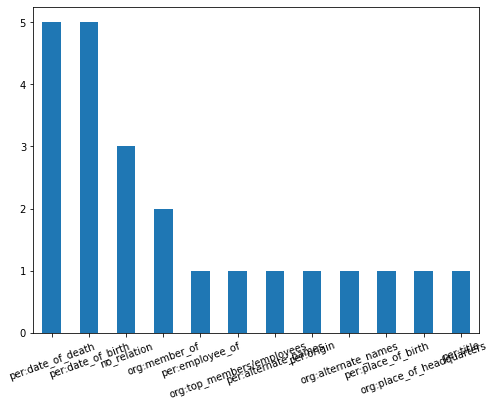

In [11]:
from matplotlib import pyplot as plt
def draw_graph(df2):
    # label의 분포
    df2[1].value_counts().plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()
draw_graph(df2)

### ㈜ -> (주) 처리후 entity들이 sentence에 있는지 확인

In [12]:
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    if sub_word not in sen:
        print(sen)
        print(sub_word)
    if obj_word not in sen:
        print(sen)
        print(obj_word)

★★★진지왕★★★<眞智王, ~ ★★★579년 8월 24일 <음력 7월 17일>★★★<음력 7월 17일>, 재위: 576년~579년>은 신라의 제25대 임금이다.
579년 8월 24일 (음력 7월 17일)
비엣남꾸옥전당 <Việt Nam Quốc Dân Đảng, 베트남 國民黨, ★★★베트남 국민당★★★, 약칭: ★★★비엣꾸옥 <Việt Quốc>★★★<Việt Quốc>>은 과거 베트남의 우익정당이며, 현재는 해외에 이전하는 망명정당이다.
비엣꾸옥 (Việt Quốc)
★★★동치제★★★<同治帝, 함풍<咸豊><咸豊> 6년 3월 23일<1856년 4월 27일> ~ ★★★동치<同治> 13년 12월 5일<1875년 1월 12일>★★★>은 중국 청 왕조의 제10대 황제<재위 1861년 ~ 1874년>이다.
동치(同治) 13년 12월 5일(1875년 1월 12일)


### 괄호 날리기 테스트

In [13]:
def remove_paren(sen,sub,obj):
    items = re.findall('\(([^)]+)', sen) 
    test=list(re.finditer('\(([^)]+)', sen))
    save=[]
    iterator = re.finditer('\(([^)]+)' ,sen)
    for match in iterator:
        temp=[]
        temp.append(match.start())
        temp.append(match.end())
        save.append(temp)
    
    #save는 items에 들어있는 문자열의 시작/끝 index가 들어있음
    
    for idx, i in enumerate(items):
        if not sub in i and not obj in i and not i in sub and not i in obj: #괄호 날림. @로 바꿔줌
            j=""
            for x in range(save[idx][1]-save[idx][0]+1):
                j+="@"
            sen =sen[:save[idx][0]] + j + sen[save[idx][1]+1:]
    sen=sen.replace("@","")
    return sen

In [14]:
sent="그룹 에프엑스(f(x)(x)) 멤버 엠버가 SM엔터테인먼트를 떠난다."
#{'word': 'f(x)', 'start_idx': 8, 'end_idx': 11, 'type': 'ORG'}","{'word': '에프엑스', 'start_idx': 3, 'end_idx': 6, 'type': 'PER'}",org:alternate_names,wikitree
sub_word="f(x)"
obj_word="에프엑스"
star_sen=add_star(sent, sub_word, obj_word, 8,11,3,6)
print(star_sen)
# sen_test="한국동서발전(주)(사장 박일준)는 9일(월) 본사(울산 중구 소재) 및 울산 농수산"
# sub_test="한국동서발전(주)"
# obj_test="박일준"
# print(sen_test)
# print(remove_paren(sen_test,sub_test,obj_test))

그룹 ★★★에프엑스★★★(★★★f(x)★★★(x)) 멤버 엠버가 SM엔터테인먼트를 떠난다.


In [15]:
#한국동서발전(주)(사장 박일준)는 9일(월) 본사(울산 중구 소재) 및 울산 농수산
save=[]

idx=0
cnt=0
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):

    #items = re.findall('\(([^)]+)', sen) #괄호 안에 있는 문자열
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    
    df['sentence'][idx]=remove_paren(sen,sub_word,obj_word)
    
    idx+=1
                
df2= pd.DataFrame(df)
df2

<ipython-input-15-b598f74bee8c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][idx]=remove_paren(sen,sub_word,obj_word)


,Unnamed: 0,id,sentence,subject_entity,object_entity,label,source
0,21361,21379,도요하시 역. - ★★★기후 역★★★ 구간의 각 도시를 연결. 나고야 철도 창립 때...,"{'word': '도카이 여객철도', 'start_idx': 60, 'end_idx...","{'word': '기후 역', 'start_idx': 10, 'end_idx': 1...",no_relation,wikipedia
1,2085,2086,그러나 남편 ★★★콘라트 2세★★★가 황제관을 쓴 뒤 13일 만에 ★★★기젤라★★★...,"{'word': '콘라트 2세', 'start_idx': 7, 'end_idx': ...","{'word': '기젤라', 'start_idx': 31, 'end_idx': 33...",per:spouse,wikipedia
2,15841,15855,"이후 인하대학교를 졸업하고 ★★★1982년★★★ KBO 리그가 출범하자, ★★★OB...","{'word': 'OB 베어스', 'start_idx': 35, 'end_idx':...","{'word': '1982년', 'start_idx': 15, 'end_idx': ...",org:founded,wikipedia
3,15514,15527,★★★2016★★★년 시즌 스프링 트레이닝 시작 직전에 우리베는 ★★★클리블랜드 인...,"{'word': '클리블랜드 인디언스', 'start_idx': 30, 'end_i...","{'word': '2016', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
4,12544,12555,아시아나항공[020560]의 새 주인으로 ★★★HDC현대산업개발★★★[294870]...,"{'word': 'HDC그룹', 'start_idx': 46, 'end_idx': ...","{'word': 'HDC현대산업개발', 'start_idx': 23, 'end_id...",org:members,wikitree
...,...,...,...,...,...,...,...
3238,22639,22661,"★★★미키스 테오도라키스★★★(그리스어: ★★★Μίκης Θεοδωράκης★★★,...","{'word': '미키스 테오도라키스', 'start_idx': 0, 'end_id...","{'word': 'Μίκης Θεοδωράκης', 'start_idx': 17, ...",per:alternate_names,wikipedia
3239,4895,4898,★★★여수시★★★(시장 ★★★권오봉★★★)는 2020년 첫 전시로 여수민족미술협회 ...,"{'word': '여수시', 'start_idx': 0, 'end_idx': 2, ...","{'word': '권오봉', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
3240,11084,11094,★★★토마스 바흐★★★ ★★★국제올림픽위원회★★★ 위원장을 비롯한 다수의 국제 스포...,"{'word': '국제올림픽위원회', 'start_idx': 7, 'end_idx'...","{'word': '토마스 바흐', 'start_idx': 0, 'end_idx': ...",org:top_members/employees,wikitree
3241,24214,24237,★★★트빌리시★★★ 대학교(오늘날 그의 이름이 남겨진 I. 자바키슈빌리 트빌리시 국...,"{'word': '조지아', 'start_idx': 64, 'end_idx': 66...","{'word': '트빌리시', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [16]:
idx=0
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    if "<" in sen:
        print(sen)
    if ">" in sen:
        print(sen)
    sen=sen.replace("<","(")
    sen=sen.replace(">",")")
    df['sentence'][idx]=sen
    idx+=1

<ipython-input-16-e421bfccdfba>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][idx]=sen


2014 시즌이 끝나자 FA 기간을 통해서 내부 1명<김경언>과 외부 3명<권혁, 배영수, ★★★송은범★★★>과 계약에 성공하였고, 타팀에 방출된 8명 <황선일, 권용관, 이주호 <이하 LG 트윈스><이하 LG 트윈스>, 임경완 <★★★SK 와이번스★★★>, 오윤 <넥센 히어로즈>, 채기영, 정유철, 신정윤 <이하 고양 원더스>> 계약했다.
2014 시즌이 끝나자 FA 기간을 통해서 내부 1명<김경언>과 외부 3명<권혁, 배영수, ★★★송은범★★★>과 계약에 성공하였고, 타팀에 방출된 8명 <황선일, 권용관, 이주호 <이하 LG 트윈스><이하 LG 트윈스>, 임경완 <★★★SK 와이번스★★★>, 오윤 <넥센 히어로즈>, 채기영, 정유철, 신정윤 <이하 고양 원더스>> 계약했다.
2003년, ★★★노르웨이★★★ ★★★오슬로★★★ 대학의 Anne Kristin Bakkestuen과 Lise-Lotte Gundersen이 아세트산구리<copper<II><II> acetate> 존재 하에서 N9 원자에 아무것도 치환되지 않은 퓨린 유도체에 아릴기를 직접 치환하는 데 성공하였다.
2003년, ★★★노르웨이★★★ ★★★오슬로★★★ 대학의 Anne Kristin Bakkestuen과 Lise-Lotte Gundersen이 아세트산구리<copper<II><II> acetate> 존재 하에서 N9 원자에 아무것도 치환되지 않은 퓨린 유도체에 아릴기를 직접 치환하는 데 성공하였다.
★★★김호철★★★<金浩哲, 1955년 2월 5일<음력 1월 13일><음력 1월 13일> ~ >은 대한민국의 배구 선수이자, ★★★대한민국 배구 국가대표팀★★★의 감독이며, 아시안 게임과 유니버시아드 감독이기도 하다.
★★★김호철★★★<金浩哲, 1955년 2월 5일<음력 1월 13일><음력 1월 13일> ~ >은 대한민국의 배구 선수이자, ★★★대한민국 배구 국가대표팀★★★의 감독이며, 아시안 게임과 유니버시아드 감독이기도 하다.
이건희는 ★★★삼성그룹★★★ 임원 72명 명의 260개 차명계좌를 개설하

In [17]:
idx=0
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    if "<" in sen:
        print(sen)
    if ">" in sen:
        print(sen)
    sen=sen.replace("<","(")
    sen=sen.replace(">",")")
    df['sentence'][idx]=sen
    idx+=1

<ipython-input-17-e421bfccdfba>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][idx]=sen


### 괄호 날린후 entity들이 sentence에 있는지 확인 -> '<', '>'를 '(', ')'로 바꾸자

In [18]:
idx=0
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    if sub_word not in sen:
        print(sen)
        print(sub_word)
        sen=sen.replace("<","(")
        sen=sen.replace(">",")")
        df['sentence'][idx]=sen
    if obj_word not in sen:
        print(sen)
        print(obj_word)
        sen=sen.replace("<","(")
        sen=sen.replace(">",")")
        df['sentence'][idx]=sen
    idx+=1

In [19]:
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    if sub_word not in sen:
        print(sen)
        print(sub_word)
    if obj_word not in sen:
        print(sen)
        print(obj_word)

### (~~) (~~) 제거

In [20]:
# import re
# def parenthesis_drop_duplicate(sentence: str):
#     parentheses = re.findall(r'\([^)]*\)', sentence)
#     replace_list = []
#     for parenthesis in parentheses:
#         if parenthesis+parenthesis in sentence:
#             replace_list.append((parenthesis*2, parenthesis))
            
#     for current, replace in replace_list:
#         sentence = sentence.replace(current, replace)
#     return sentence

In [21]:
# test_sen="2014 시즌이 끝나자 FA 기간을 통해서 내부 1명(김경언)과 외부 3명(권혁, 배영수, 송은범)과 계약에 성공하였고, 타팀에 방출된 8명 (황선일, 권용관, 이주호 (이하 LG 트윈스)(이하 LG 트윈스), 임경완 (SK 와이번스), 오윤 (넥센 히어로즈), 채기영, 정유철, 신정윤 (이하 고양 원더스)) 계약했다."
# print(parenthesis_drop_duplicate(test_sen))

In [22]:
# df['sentence']=df['sentence'].map(parenthesis_drop_duplicate)

### 마지막으로 한 번 더 확인

In [23]:
for sen, sub, obj in zip(df['sentence'], df['subject_entity'], df['object_entity']):
    sub = eval(sub)
    obj = eval(obj)
    sub_word=sub['word']
    obj_word=obj['word']
    if sub_word not in sen:
        print(sen)
        print(sub_word)
    if obj_word not in sen:
        print(sen)
        print(obj_word)

In [73]:
df.to_csv('/opt/ml/project2/level2_klue_nlp-level2-nlp-01/dataset/train/paren_star_val_split.csv', index=False)